In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('D:\dickys task\Happy Work\BootUP\data_maintanance.xlsx')
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [3]:
df.shape

(1000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
lifetime          1000 non-null int64
broken            1000 non-null int64
pressureInd       996 non-null float64
moistureInd       1000 non-null float64
temperatureInd    997 non-null float64
team              1000 non-null object
provider          1000 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
print(df['team'].unique())
print(df['provider'].unique())

['TeamA' 'TeamC' 'TeamB']
['Provider4' 'Provider1' 'Provider2' 'Provider3']


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


- The range between Q3 and max in moistureid is too far, it may have the outliers

## Data Cleaning

In [8]:
#Checking missing value

df.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

In [9]:
#Checking the skewness

df.skew()

lifetime          -0.407597
broken             0.421663
pressureInd        0.117541
moistureInd       15.982324
temperatureInd    -0.070839
dtype: float64

In [10]:
#Filling missing values

df.pressureInd.fillna(df.pressureInd.median(), inplace=True)
df.temperatureInd.fillna(df.temperatureInd.mean(), inplace=True)
print(df.isnull().sum())

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64


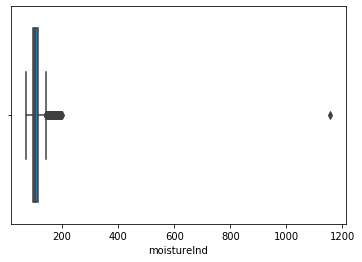

In [11]:
#Checking the outliers
sns.boxplot(x=df.moistureInd)

### Removing outliers using IQR

In [12]:
Q1, Q3 = np.percentile(df.moistureInd, [25,75])
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

94.5325465325
113.532970475
19.000423942499992


In [13]:
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(lower_bound)
print(upper_bound)

66.03191061875002
142.03360638875


In [14]:
outliers = df[(df.moistureInd < lower_bound) | (df.moistureInd>upper_bound)]
outliers.count()

lifetime          142
broken            142
pressureInd       142
moistureInd       142
temperatureInd    142
team              142
provider          142
dtype: int64

In [15]:
df_new = df.drop(outliers.index)
df_new.shape

(858, 7)

### Removing outliers using z score

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df['moistureInd']))
print(z)

[1.64008446e-01 1.72119280e+00 7.96003708e-01 1.61185987e+00
 2.79190982e-01 1.10563169e-01 6.07069649e-01 1.95987177e+00
 1.72252617e-01 2.10554846e+00 3.48063467e-04 3.58239226e-01
 4.43032086e-01 4.09279153e-01 1.77328221e-01 3.28230474e-01
 1.89243603e-01 3.62566031e-01 5.97273310e-01 7.13888071e-02
 1.81401117e-01 1.93101886e-01 2.20090500e-01 5.10185469e-01
 1.38452240e-01 1.15692261e-01 1.85183122e-01 4.38437224e-01
 6.22540095e-01 1.80099876e-01 4.64690245e-01 6.87971216e-03
 4.30842675e-01 4.31665934e-01 1.90372611e+00 6.96076923e-01
 6.94710044e-01 1.91868469e+00 6.27021179e-01 5.41441982e-01
 1.72863817e+00 1.94239153e+00 2.09202963e-01 1.59192143e+00
 2.17677878e-01 1.65670285e-01 8.09330090e-02 7.43729637e-02
 4.60760136e-01 4.57291893e-01 1.79648403e+00 1.86642498e+00
 2.24673929e-01 1.47213441e-01 1.82251037e+00 1.46100286e-01
 3.81817162e-01 1.95208968e-01 1.91719448e+00 3.06309554e-01
 2.23296780e-01 5.30193944e-01 1.63100605e-01 1.25253889e-01
 1.91685286e-01 1.600566

In [17]:
threshold = 3
np.where(z>3)

(array([604], dtype=int64),)

In [18]:
df_new2 = df[~(z>3)]
df_new2.shape

(999, 7)

## Exploratory Analysis (Z-score)

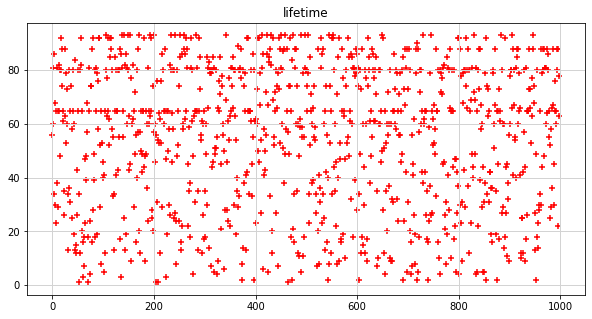

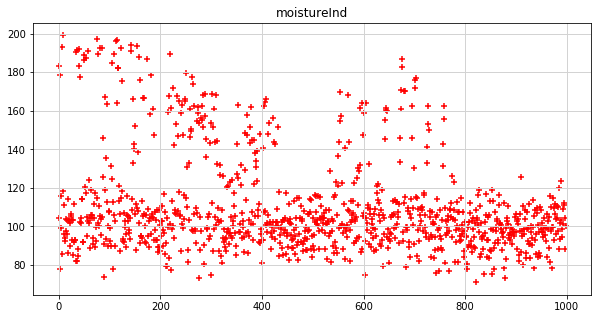

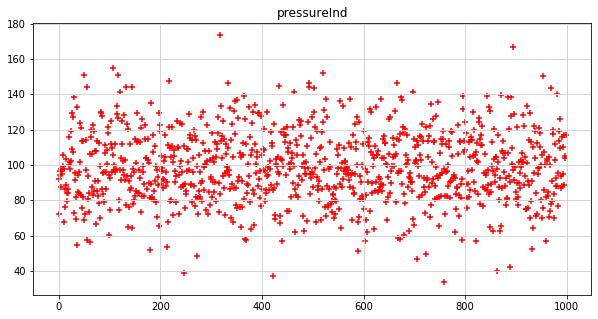

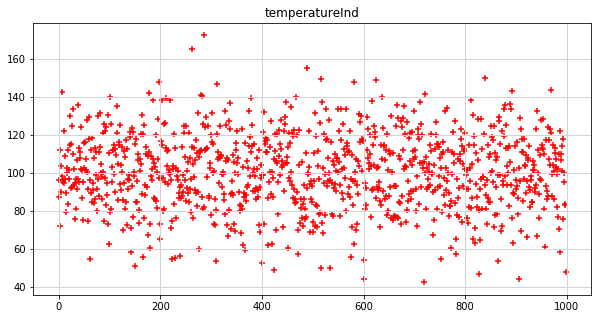

In [19]:
for col in ['lifetime', 'moistureInd', 'pressureInd', 'temperatureInd']:
    plt.figure(figsize=(10,5))
    plt.scatter(np.arange(999), df_new2[col], marker='+', color='red')
    plt.title(col)
    plt.grid(linewidth=1, color='lightgrey')
    plt.show()

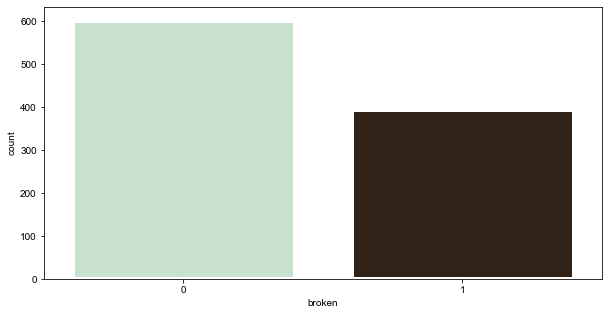

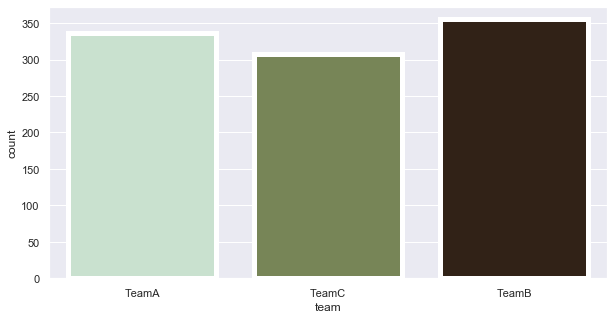

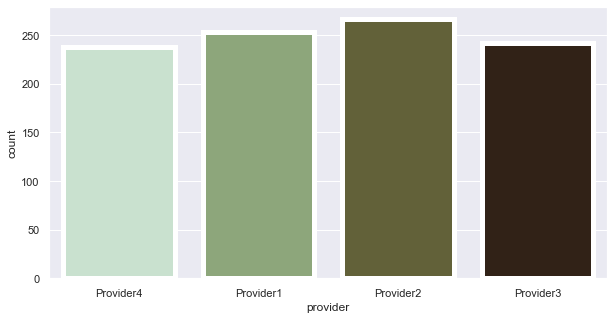

In [20]:
for col in ['broken', 'team', 'provider']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new2[col], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.show()

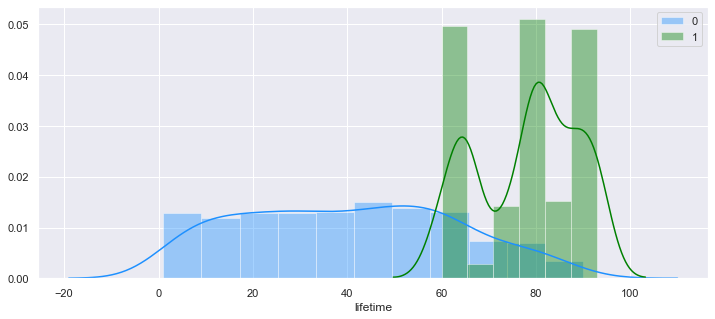

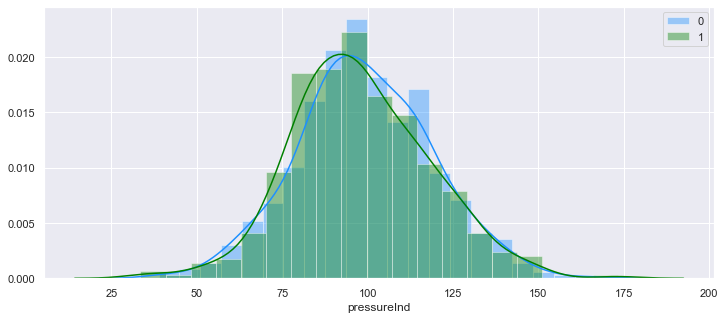

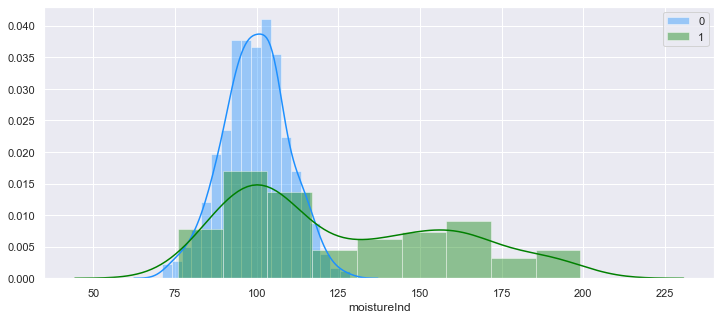

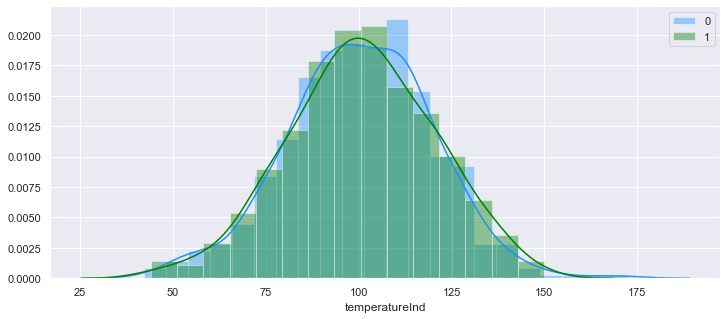

In [21]:
for col in ['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd']:
    plt.figure(figsize=(12,5))
    sns.distplot(df_new2[col][df.broken==0], color='dodgerblue')
    sns.distplot(df_new2[col][df.broken==1], color='green')
    plt.legend(['0','1'])
    sns.set_style('darkgrid')
    plt.show()

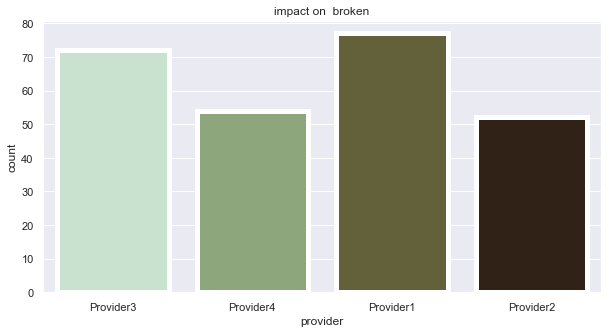

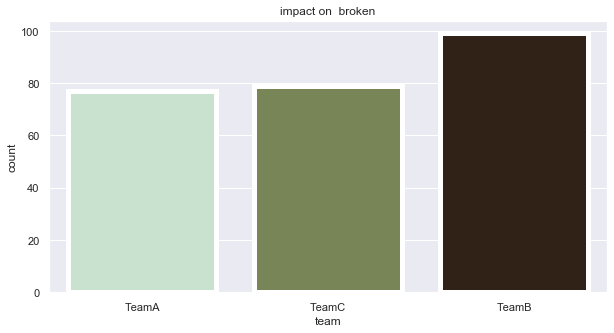

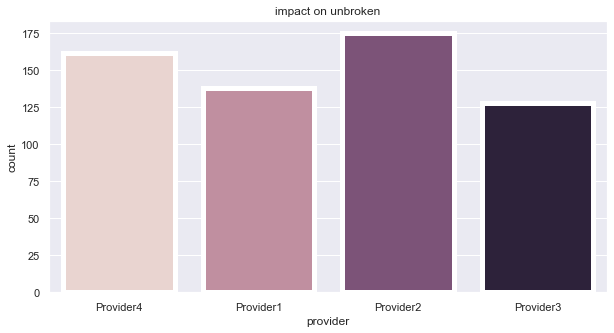

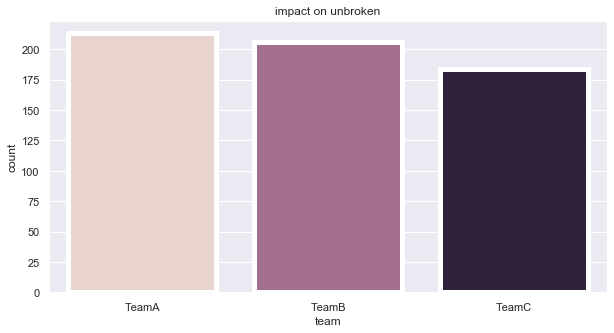

In [22]:
for col in ['provider', 'team']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col][df_new2['broken']==1], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.title('impact on  broken')
    plt.show()
for col in ['provider', 'team']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col][df_new2.broken==0], palette='ch:9', edgecolor='white', linewidth=5)
    sns.set(style='darkgrid')
    plt.title('impact on unbroken')
    plt.show()

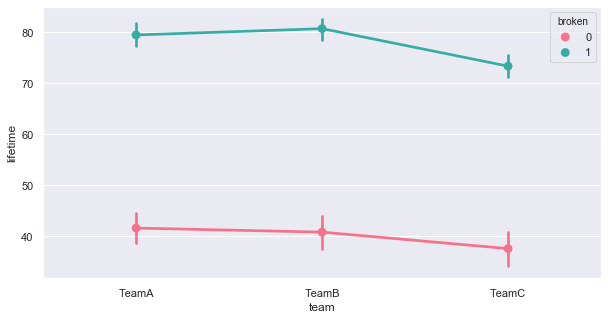

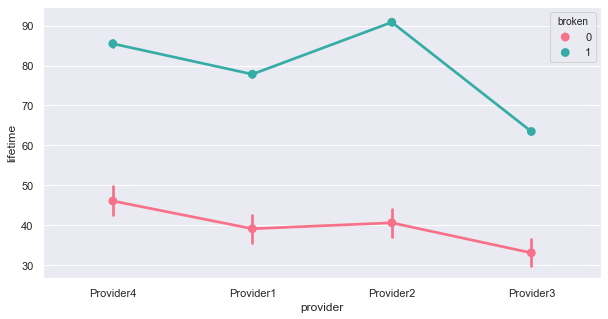

In [23]:
for col in ['team', 'provider']:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=col, y=df_new2['lifetime'], hue='broken', data=df_new, palette=('husl'), alpha=8)
    sns.set(style='darkgrid')
    plt.show()

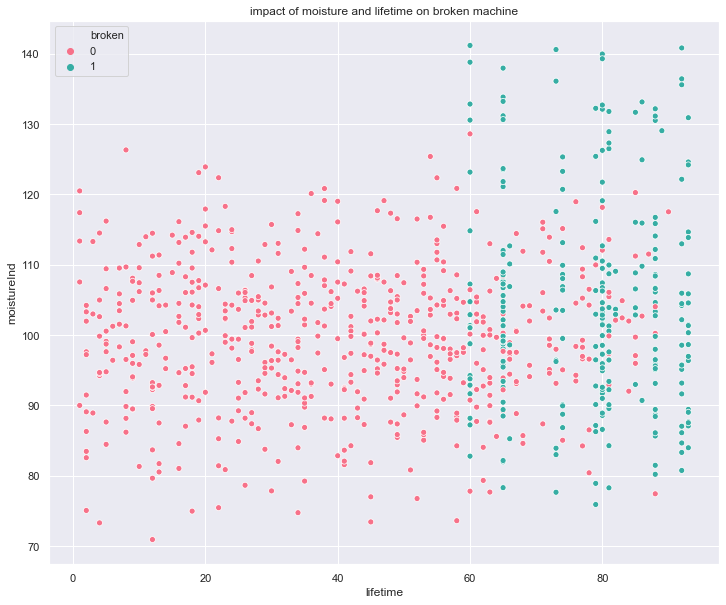

In [24]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='lifetime', y='moistureInd', hue='broken', data=df_new, palette=('husl'))
plt.title('impact of moisture and lifetime on broken machine')
plt.show()

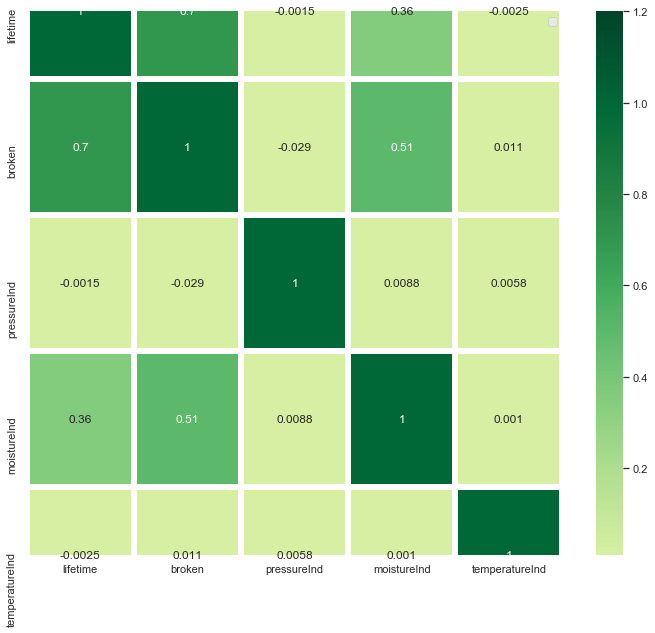

In [25]:
cor=df_new2.corr()

plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, linewidth=5, cmap='YlGn', center=0.4, vmin=0.01, vmax=1.2)
plt.legend('Correlation Between Each Feature')

## Exploratory Analysis (IQR)

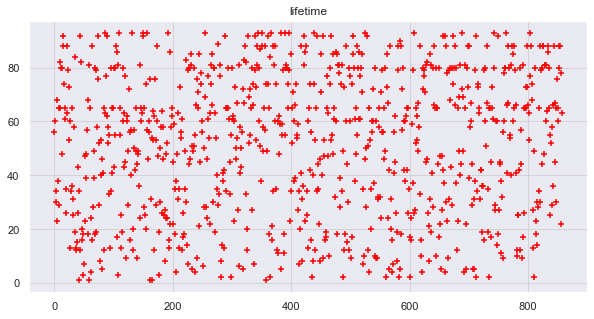

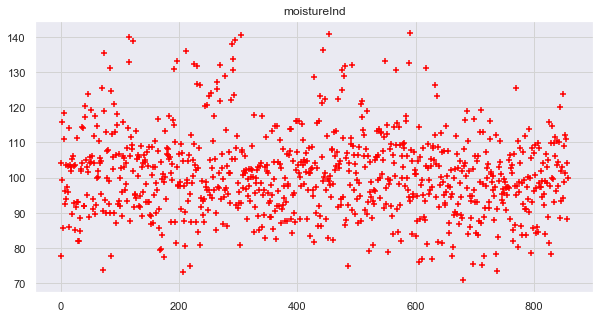

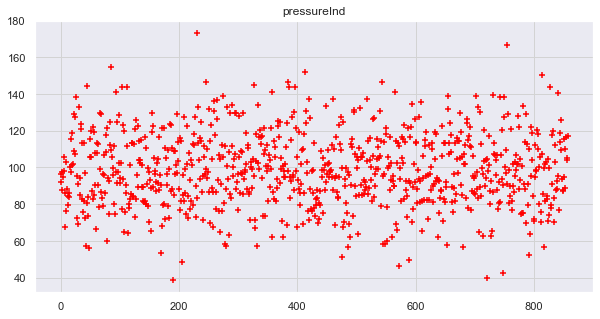

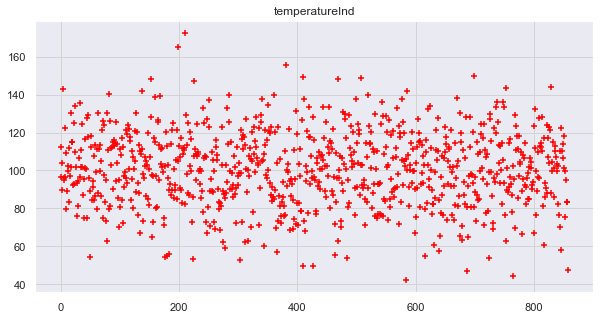

In [26]:
for col in ['lifetime', 'moistureInd', 'pressureInd', 'temperatureInd']:
    plt.figure(figsize=(10,5))
    plt.scatter(np.arange(858), df_new[col], marker='+', color='red')
    plt.title(col)
    plt.grid(linewidth=1, color='lightgrey')
    plt.show()

- majority of moistureInd concentrated between 80 to 120 and few of them are >120

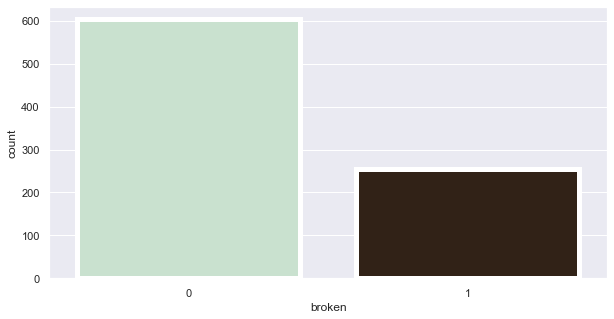

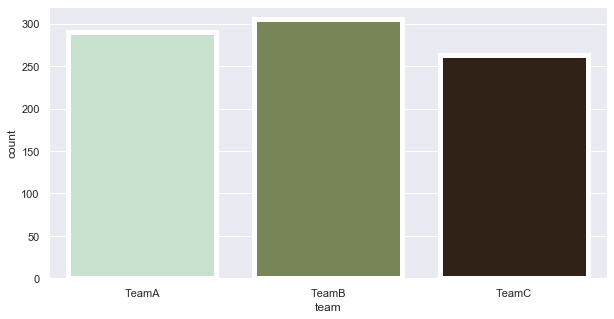

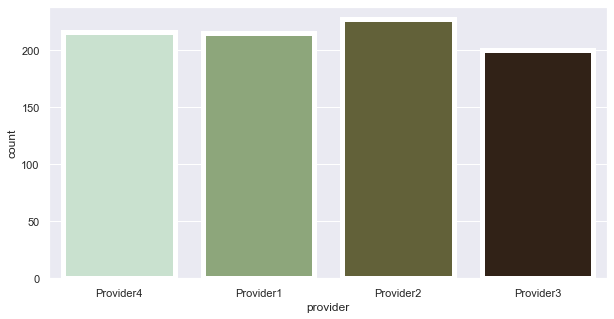

In [27]:
for col in ['broken', 'team', 'provider']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.show()

In [28]:
df_new['provider'].value_counts()

Provider2    227
Provider4    216
Provider1    215
Provider3    200
Name: provider, dtype: int64

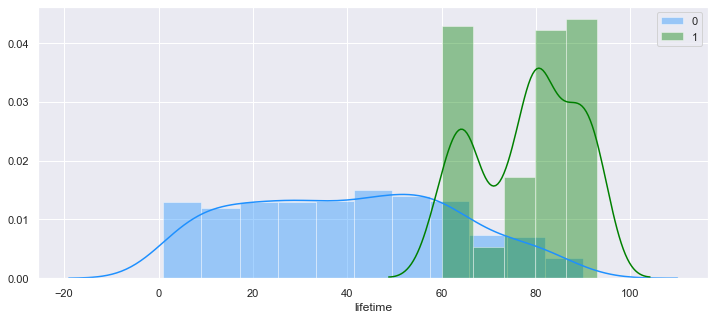

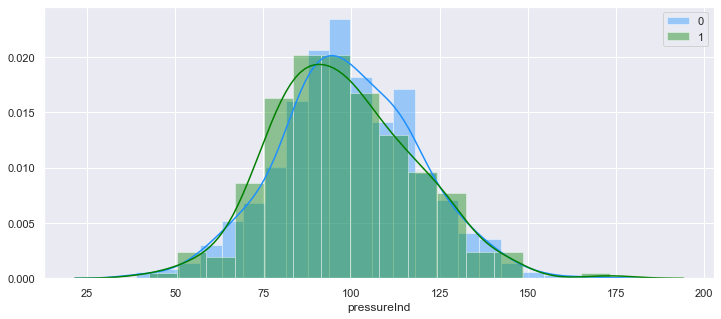

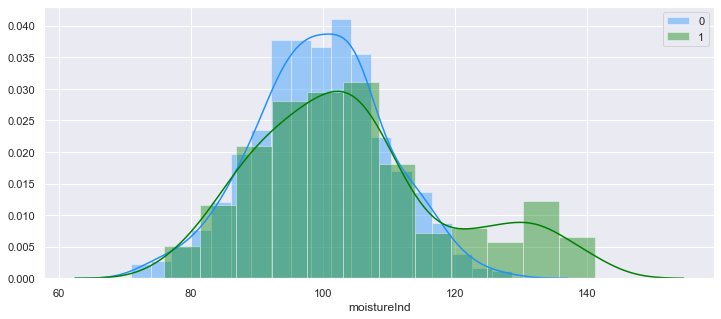

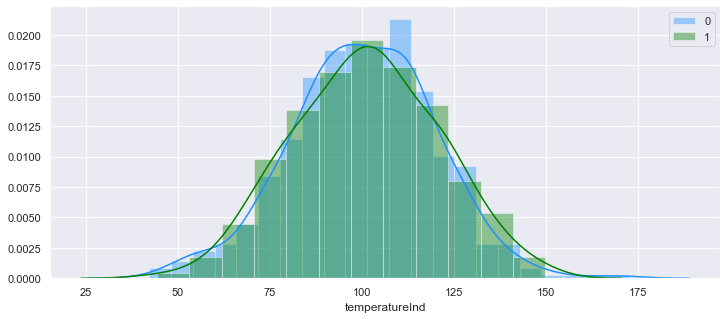

In [29]:
for col in ['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd']:
    plt.figure(figsize=(12,5))
    sns.distplot(df_new[col][df.broken==0], color='dodgerblue')
    sns.distplot(df_new[col][df.broken==1], color='green')
    plt.legend(['0','1'])
    sns.set_style('darkgrid')
    plt.show()

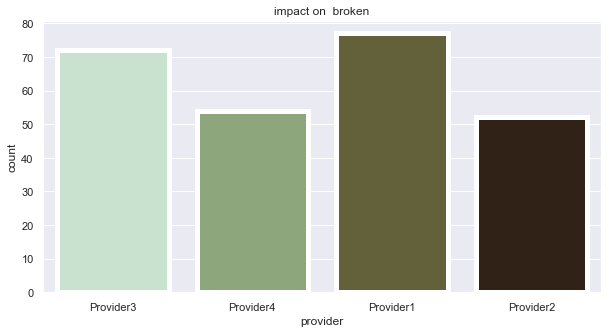

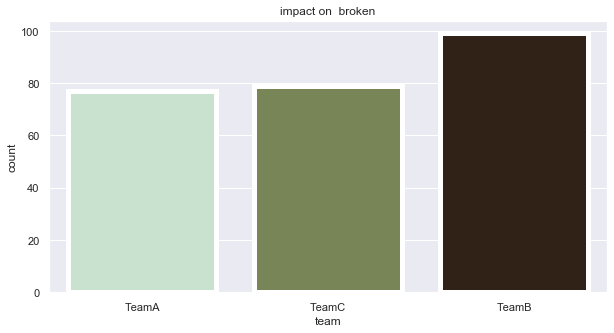

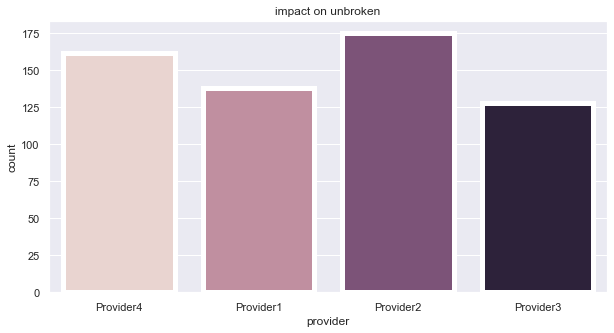

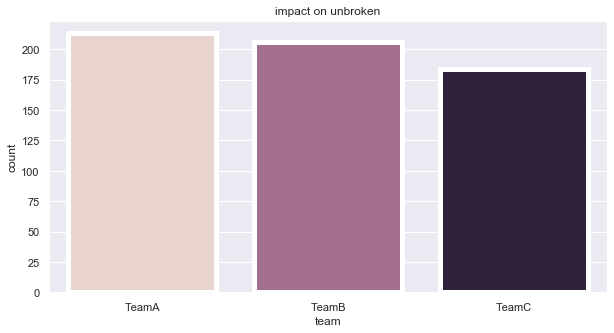

In [30]:
for col in ['provider', 'team']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col][df_new['broken']==1], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.title('impact on  broken')
    plt.show()
for col in ['provider', 'team']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col][df_new.broken==0], palette='ch:9', edgecolor='white', linewidth=5)
    sns.set(style='darkgrid')
    plt.title('impact on unbroken')
    plt.show()

In [31]:
(df_new['team'][df_new.broken==1]).value_counts()

TeamB    99
TeamC    79
TeamA    77
Name: team, dtype: int64

In [32]:
(df_new['team'][df_new.broken==0]).value_counts()

TeamA    213
TeamB    206
TeamC    184
Name: team, dtype: int64

In [33]:
df_new.broken.value_counts()

0    603
1    255
Name: broken, dtype: int64

- of all the broken machines, a small part of it sold by provider2 and provider4
- team a has the lowest impact on broken machine
- team b is the team that handle most of the broken machine, but also has the high impact on unbroken machine
- team c has the low impact both on the broken and unbroken machines
- it can conclude that provider2 and provider 4 sell the better machines than the others, while team a is the most rarely team that produce the broken machine after handling it

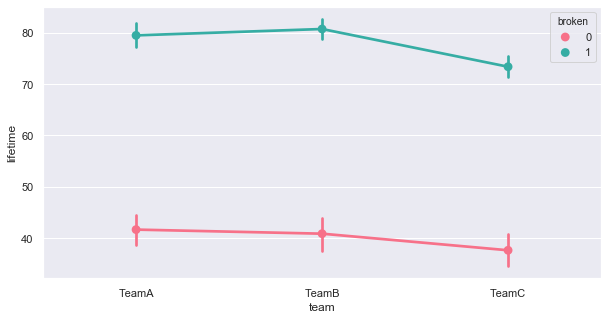

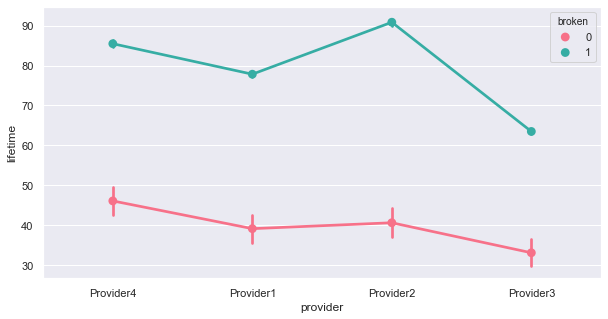

In [34]:
for col in ['team', 'provider']:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=col, y=df_new['lifetime'], hue='broken', data=df_new, palette=('husl'), alpha=8)
    sns.set(style='darkgrid')
    plt.show()

Graph 1:
- the broken machines have the lifetime >70 months and all team ever managed the broken machines
- in more detailed, team c handle the broken machines which their lifetime's mean is about 72 months which is the lowest compared to others. So, it's natural that team c has the low impact on broken machine
- but, in the other hand team a ever managed the broken machines which their lifetime's mean is almost 80 months which is higher than team c but at the same time team a has the lowest impact on broken machine. It shows that team a has a good capability on managing machine

Graph 2:
- the broken machines have lifetime's mean >60 months and all providers ever sold them
- in more detailed, especially for provider3, machines that sold by them are broken at lifetime's mean of 62 months which is the lowest compared by others. It shows that provider3 may be the worst provider.
- in contrast to provider 3, provider 2 may be the best provider since the machine sold by them are broken at lifetime's mean 90 months which is durable and the oldest compared by others.

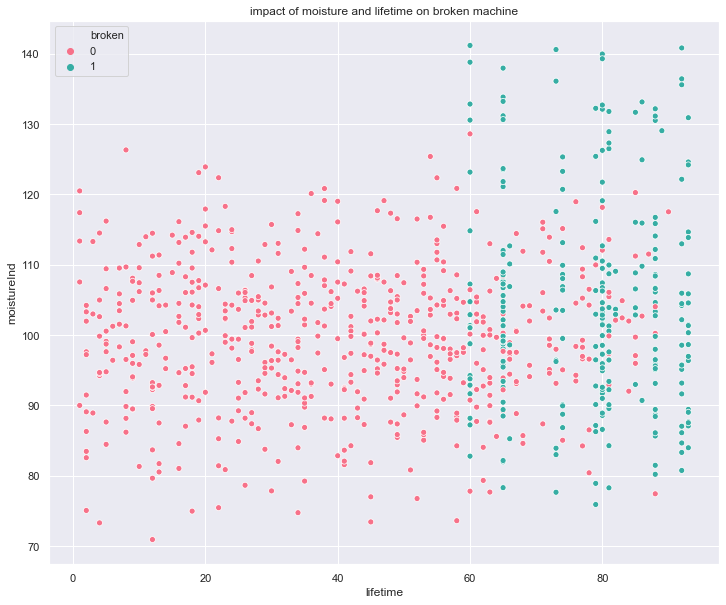

In [35]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='lifetime', y='moistureInd', hue='broken', data=df_new, palette=('husl'))
plt.title('impact of moisture and lifetime on broken machine')
plt.show()

- the machine that has lifetime >60 months and moisture>130 are broken

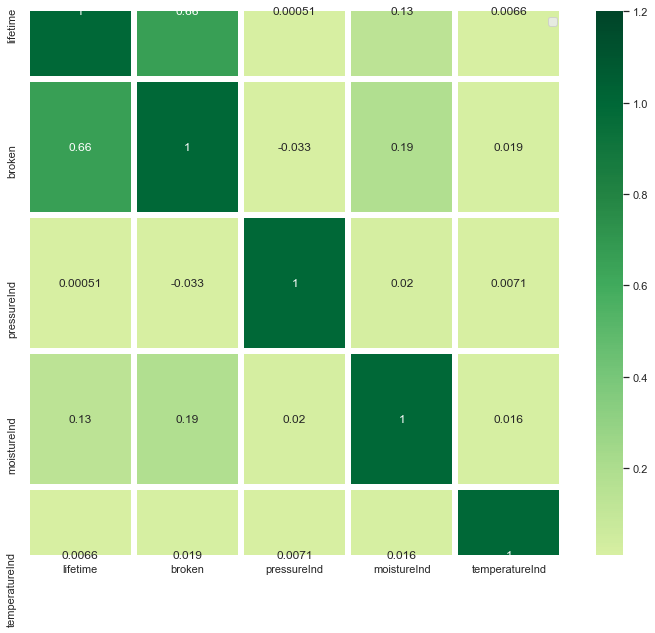

In [36]:
corr=df_new.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, linewidth=5, cmap='YlGn', center=0.4, vmin=0.01, vmax=1.2)
plt.legend('Correlation Between Each Feature')

- lifetime has a very good positive relationship with broken (0.66)
- moisture has a good positive relationship with broken (0.19)

## Dummies variable (Z-Score)

In [37]:
dummies2 = pd.get_dummies(df_new2[['team','provider']])
dummies2

,team_TeamA,team_TeamB,team_TeamC,provider_Provider1,provider_Provider2,provider_Provider3,provider_Provider4
0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0
4,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1
996,1,0,0,0,0,0,1
997,0,1,0,1,0,0,0
998,1,0,0,0,0,0,1


In [38]:
df_new2_merged=pd.concat([df_new2, dummies2], axis=1)
df_new2_merged

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,team_TeamA,team_TeamB,team_TeamC,provider_Provider1,provider_Provider2,provider_Provider3,provider_Provider4
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4,1,0,0,0,0,0,1
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4,0,0,1,0,0,0,1
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1,1,0,0,1,0,0,0
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2,0,0,1,0,1,0,0
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4,0,1,0,0,0,0,1
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4,1,0,0,0,0,0,1
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1,0,1,0,1,0,0,0
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4,1,0,0,0,0,0,1


In [39]:
final2=df_new2_merged.drop(['team_TeamC','provider_Provider4','team','provider'], axis='columns')
final2

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team_TeamA,team_TeamB,provider_Provider1,provider_Provider2,provider_Provider3
0,56,0,92.178854,104.230204,96.517159,1,0,0,0,0
1,81,1,72.075938,183.065701,87.271062,0,0,0,0,0
2,60,0,96.272254,77.801376,112.196170,1,0,1,0,0
3,86,1,94.406461,178.493608,72.025374,0,0,0,1,0
4,34,0,97.752899,99.413492,103.756271,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,0,1,0,0,0
996,88,1,116.727075,110.871332,95.075631,1,0,0,0,0
997,22,0,104.026778,88.212873,83.221220,0,1,1,0,0
998,78,0,104.911649,104.257296,83.421491,1,0,0,0,0


## Dummies variable (IQR)

In [40]:
dummies = pd.get_dummies(df_new[['team','provider']])
dummies

,team_TeamA,team_TeamB,team_TeamC,provider_Provider1,provider_Provider2,provider_Provider3,provider_Provider4
0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0
4,0,1,0,1,0,0,0
5,1,0,0,1,0,0,0
6,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1
996,1,0,0,0,0,0,1
997,0,1,0,1,0,0,0
998,1,0,0,0,0,0,1


In [41]:
df_new_merged=pd.concat([df_new, dummies], axis=1)
df_new_merged

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,team_TeamA,team_TeamB,team_TeamC,provider_Provider1,provider_Provider2,provider_Provider3,provider_Provider4
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4,1,0,0,0,0,0,1
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1,1,0,0,1,0,0,0
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1,0,1,0,1,0,0,0
5,30,0,87.678801,115.712262,89.792105,TeamA,Provider1,1,0,0,1,0,0,0
6,68,0,94.614174,85.702236,142.827001,TeamB,Provider2,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4,0,1,0,0,0,0,1
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4,1,0,0,0,0,0,1
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1,0,1,0,1,0,0,0
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4,1,0,0,0,0,0,1


In [42]:
final=df_new_merged.drop(['team_TeamC','provider_Provider4'], axis='columns')

In [43]:
final.drop(['team','provider'], axis='columns')

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team_TeamA,team_TeamB,provider_Provider1,provider_Provider2,provider_Provider3
0,56,0,92.178854,104.230204,96.517159,1,0,0,0,0
2,60,0,96.272254,77.801376,112.196170,1,0,1,0,0
4,34,0,97.752899,99.413492,103.756271,0,1,1,0,0
5,30,0,87.678801,115.712262,89.792105,1,0,1,0,0
6,68,0,94.614174,85.702236,142.827001,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,0,1,0,0,0
996,88,1,116.727075,110.871332,95.075631,1,0,0,0,0
997,22,0,104.026778,88.212873,83.221220,0,1,1,0,0
998,78,0,104.911649,104.257296,83.421491,1,0,0,0,0


## Building model (Z-Score)

In [44]:
x = final2[['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd', 'team_TeamA', 'team_TeamB', 'provider_Provider1', 'provider_Provider2', 'provider_Provider3']]
y = final2['broken']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(999, 9)
(799, 9)
(200, 9)
(999,)
(799,)
(200,)


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = model.predict(xtest)

In [48]:
model.predict([[68,94.614174,85.702236,142.827001,0,1,0,1,0]])

array([0], dtype=int64)

In [49]:
model.score(xtest,ytest)

0.93

## Building model (IQR)

In [50]:
x = final[['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd', 'team_TeamA', 'team_TeamB', 'provider_Provider1', 'provider_Provider2', 'provider_Provider3']]
y = final['broken']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(858, 9)
(686, 9)
(172, 9)
(858,)
(686,)
(172,)


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [53]:
model.fit(x_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = model.predict(x_test)

In [55]:
model.predict([[78,104.911649,104.257296,83.421491,1,0,0,0,0]])

array([1], dtype=int64)

In [56]:
model.score(x_test,y_test)

0.8953488372093024